In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ETF1=pd.read_csv('00690.csv')
ETF2=pd.read_csv('00728.csv')

ETF1.set_index(pd.to_datetime(ETF1['Date']),inplace=True)
ETF1.drop('Date',axis=1,inplace=True)
ETF2.set_index(pd.to_datetime(ETF2['Date']),inplace=True)
ETF2.drop('Date',axis=1,inplace=True)

df=pd.merge(ETF1,ETF2,left_index=True,right_index=True,how='inner')
df.rename(columns={'Price_x':'00690','Price_y':'00728'},inplace=True)
df.head()

,00690,00728
Date,,
2018-04-18,22.06,19.57
2018-04-19,22.23,19.85
2018-04-20,21.97,19.55
2018-04-23,21.84,19.33
2018-04-24,21.73,19.07


# 夏普比率 (Sharpe Ratio )
## 衡量承擔相同風險下所獲得的報酬
## $$Sharpe \ \ ratio= \frac{r_i-r_f}{\sigma}$$

In [3]:
r=df.pct_change(1)
r.head()

C:\Users\tinah\Anaconda3\lib\site-packages\pandas\compat\_optional.py:106: UserWarning: Pandas requires version '2.6.2' or newer of 'numexpr' (version '2.6.1' currently installed).
  warnings.warn(msg, UserWarning)


,00690,00728
Date,,
2018-04-18,NaN,NaN
2018-04-19,0.007706,0.014308
2018-04-20,-0.011696,-0.015113
2018-04-23,-0.005917,-0.011253
2018-04-24,-0.005037,-0.013451


In [4]:
ar=r.mean()*252
std=r.std()*252**0.5
sp=ar/std*100
sp

00690    45.909968
00728    35.141842
dtype: float64

## Rolling Sharpe Ratios

In [5]:
ar=r.rolling(252).mean()*252
std=r.rolling(252).std()*252**0.5

In [6]:
ar.dropna(inplace=True)
std.dropna(inplace=True)
sp=ar/std*100

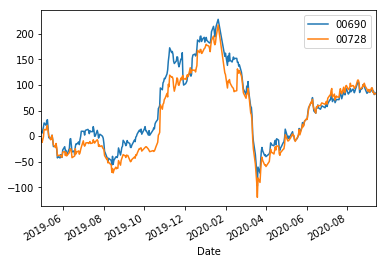

In [7]:
sp.plot()

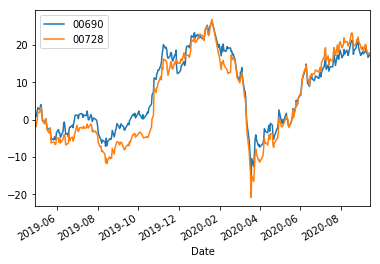

In [8]:
(ar*100).plot()

# 索提諾比率 (Sortino Ratio)
## 衡量相同下行風險下所獲得的報酬
## $$Sortino \ \ ratio=\frac{R-T}{\sigma_D}$$

In [9]:
std=r.std()*252**0.5
std

00690    0.163985
00728    0.180594
dtype: float64

In [10]:
std_D=r[r<0].std()*252**0.5
std_D

00690    0.134364
00728    0.168900
dtype: float64

In [11]:
ar=r.mean()*252
st=ar/std_D*100
st

00690    56.031119
00728    37.574767
dtype: float64